## Ekstraksi Ciri

### Library

In [1]:
import glob
import os 
import numpy
import matplotlib.pyplot as plt
import math
import cv2
import pandas as pd
from PIL import Image
import pingouin as pg

### Show Image

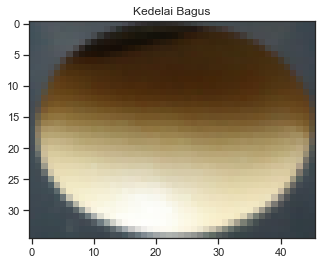

In [2]:
colourImg = Image.open("Biji Bagus/biji_0.0.png")
colourPixels = colourImg.convert("RGB")
plt.title("Kedelai Bagus")
plt.imshow(colourPixels)

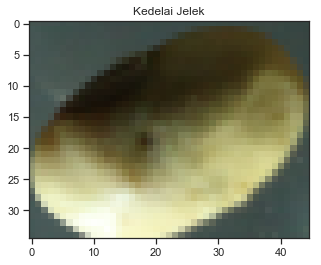

In [3]:
colourImg = Image.open("Biji Jelek/biji_10.1.png")
colourPixels = colourImg.convert("RGB")
plt.title("Kedelai Jelek")
plt.imshow(colourPixels)

### Ekstraksi Warna pada Biji Kedelai Bagus

#### 1. Convert nilai pixel pada gambar 
#### 2. Rata-ratakan ke nilai R, G, dan B dengan hasil jumlah R, G, dan B pada gambar objek[i] dibagi dengan nilai rataan pixel pada gambar 

In [4]:
data = []
for i in glob.iglob("Biji Bagus/*"):
    image = cv2.imread(i)
    avg_color_per_row = numpy.average(image, axis=0)
    avg_color = numpy.average(avg_color_per_row, axis=0)
    data.append(avg_color)

In [5]:
f1 = pd.DataFrame(data, columns=['Red', 'Green', 'Blue'])
f1

,Red,Green,Blue
0,90.363975,114.469565,126.575776
1,92.500000,118.134569,129.025718
2,95.430680,117.470475,127.288190
3,81.403055,103.683901,114.421857
4,81.933107,104.945011,116.504535
5,109.300570,146.877493,153.172365
6,103.872705,138.915545,144.293758
7,103.377289,139.853480,145.479853
8,75.592375,112.730938,122.428886
9,79.701744,110.427907,116.730233


### Ekstraksi Bentuk pada Biji Kedelai Bagus

#### Image Moment
#### M00 = Jumlah area pixel biner/binary 
#### M10 = Jumlah area pixel Xi
#### M01 = Jumlah area pixel Yi

22
17


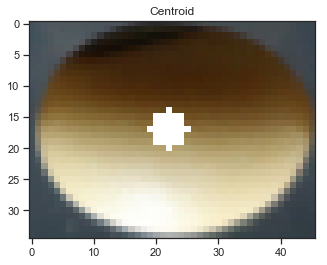

In [6]:
image = cv2.imread("Biji Bagus/biji_0.0.png")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
red_min = numpy.array([45, 1, 1], numpy.uint8)
red_max = numpy.array([255, 255, 255], numpy.uint8)
mask_inverse = cv2.inRange(hsv, red_min, red_max)
mask = cv2.bitwise_not(mask_inverse)
image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
edges = cv2.Canny(binary, 0, 300)
M = cv2.moments(edges)
X0 = int(M["m10"] / M["m00"])
Y0 = int(M["m01"] / M["m00"])
print(X0)
print(Y0)
image = cv2.imread("Biji Bagus/biji_0.0.png")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.circle(rgb, (X0, Y0), 3, (255, 255, 255), -1)
plt.title("Centroid")
plt.imshow(rgb)

In [7]:
hasil = []
for i in glob.iglob("Biji Bagus/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300)
    M = cv2.moments(edges)
    centroid = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])
    hasil.append(centroid)

In [8]:
center = pd.DataFrame(hasil, columns=['X0', 'Y0'])
center 

,X0,Y0
0,22,17
1,20,18
2,18,18
3,21,17
4,19,19
5,14,15
6,18,18
7,16,16
8,20,11
9,21,20


#### Pythagoras
#### r1 -> x makin besar semakin ke bawah

In [9]:
x0 = []
y0 = []
x1 = []
y1 = []
for i in glob.iglob("Biji Bagus/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300, apertureSize=3)
    M = cv2.moments(edges)
    X0 = int(M["m10"] / M["m00"])
    Y0 = int(M["m01"] / M["m00"])
    x0.append(X0)
    y0.append(Y0)
    lngth = 0
    count = 0
    # x ke bawah
    for i in range(X0, len(edges), 1):
        if edges[i][Y0] == 0:
            lngth += 1
        else:
            count = lngth + 1
            lngth += 1
    
    if count == 0 or count < 8:
        count = lngth +1
   
    x1.append(count+X0)
    y1.append(Y0)
    
hasil = []
for i in range(50):
    r = ((x1[i]-x0[i])**2 + (y1[i]-y0[i])**2)
    hasil.append(math.sqrt(r))

In [10]:
f2 = pd.DataFrame(hasil, columns=['r1'])
f2 

,r1
0,12.0
1,17.0
2,19.0
3,15.0
4,22.0
5,26.0
6,26.0
7,24.0
8,12.0
9,18.0


#### Pythagoras
#### r2 -> y makin besar semakin ke kanan

In [11]:
x0 = []
y0 = []
x2 = []
y2 = []
for i in glob.iglob("Biji Bagus/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300, apertureSize=3)
    M = cv2.moments(edges)
    X0 = int(M["m10"] / M["m00"])
    Y0 = int(M["m01"] / M["m00"])
    x0.append(X0)
    y0.append(Y0)
    lngth = 0
    count = 0
    # y ke kanan
    for i in range(Y0, len(edges[X0]), 1):        
        if edges[X0][i] == 0:
            lngth += 1
        else:
            count = lngth + 1
            lngth += 1
    if count == 0 or count < 8:
        count = lngth +1
   
    x2.append(X0)
    y2.append(count+Y0)
    
hasil = []
for i in range(50):
    r = ((x2[i]-x0[i])**2 + (y2[i]-y0[i])**2)
    hasil.append(math.sqrt(r))

In [12]:
f3 = pd.DataFrame(hasil, columns=['r2'])
f3 

,r2
0,28.0
1,25.0
2,24.0
3,30.0
4,22.0
5,21.0
6,19.0
7,20.0
8,34.0
9,24.0


In [13]:
f4 = pd.concat([f2, f3], axis=1)
f4

,r1,r2
0,12.0,28.0
1,17.0,25.0
2,19.0,24.0
3,15.0,30.0
4,22.0,22.0
5,26.0,21.0
6,26.0,19.0
7,24.0,20.0
8,12.0,34.0
9,18.0,24.0


#### Pythagoras
#### r3 -> x makin kecil semakin ke atas

In [14]:
x0 = []
y0 = []
x3 = []
y3 = []
for i in glob.iglob("Biji Bagus/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300, apertureSize=3)
    M = cv2.moments(edges)
    X0 = int(M["m10"] / M["m00"])
    Y0 = int(M["m01"] / M["m00"])
    x0.append(X0)
    y0.append(Y0)
    lngth = 0
    count = 0
    # x ke atas
    for i in range(X0, -Y0, -1):
        if edges[i][Y0] == 0:
            lngth += 1
        else:
            count = lngth + 1
            lngth += 1
    if count == 0 or count < 8:
        count = lngth +1
   
    x3.append(X0-count)
    y3.append(Y0)
    
hasil = []
for i in range(50):
    r = ((x3[i]-x0[i])**2 + (y3[i]-y0[i])**2)
    hasil.append(math.sqrt(r))

In [15]:
f5 = pd.DataFrame(hasil, columns=['r3'])
f5 

,r3
0,25.0
1,23.0
2,21.0
3,24.0
4,22.0
5,14.0
6,18.0
7,16.0
8,19.0
9,24.0


#### Pythagoras
#### r4 -> y makin kecil semakin ke kiri

In [16]:
x0 = []
y0 = []
x4 = []
y4 = []
for i in glob.iglob("Biji Bagus/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300, apertureSize=3)
    M = cv2.moments(edges)
    X0 = int(M["m10"] / M["m00"])
    Y0 = int(M["m01"] / M["m00"])
    x0.append(X0)
    y0.append(Y0)
    lngth = 0
    count = 0
    # y ke kiri
    for i in range(X0, -Y0, -1):
        if edges[X0][i] == 0:
            lngth += 1
        else:
            count = lngth + 1
            lngth += 1
    if count == 0 or count < 8:
        count = lngth +1
   
    x4.append(X0)
    y4.append(Y0-count)
    
hasil = []
for i in range(50):
    r = ((x4[i]-x0[i])**2 + (y4[i]-y0[i])**2)
    hasil.append(math.sqrt(r))

In [17]:
f6 = pd.DataFrame(hasil, columns=['r4'])
f6 

,r4
0,25.0
1,23.0
2,18.0
3,21.0
4,22.0
5,17.0
6,21.0
7,16.0
8,32.0
9,21.0


In [18]:
f7 = pd.concat([f5, f6], axis=1)
f7

,r3,r4
0,25.0,25.0
1,23.0,23.0
2,21.0,18.0
3,24.0,21.0
4,22.0,22.0
5,14.0,17.0
6,18.0,21.0
7,16.0,16.0
8,19.0,32.0
9,24.0,21.0


In [19]:
f8 = pd.concat([f4, f7], axis=1)
f8

,r1,r2,r3,r4
0,12.0,28.0,25.0,25.0
1,17.0,25.0,23.0,23.0
2,19.0,24.0,21.0,18.0
3,15.0,30.0,24.0,21.0
4,22.0,22.0,22.0,22.0
5,26.0,21.0,14.0,17.0
6,26.0,19.0,18.0,21.0
7,24.0,20.0,16.0,16.0
8,12.0,34.0,19.0,32.0
9,18.0,24.0,24.0,21.0


In [20]:
f9 = pd.concat([f1, f8], axis=1)
f9

,Red,Green,Blue,r1,r2,r3,r4
0,90.363975,114.469565,126.575776,12.0,28.0,25.0,25.0
1,92.500000,118.134569,129.025718,17.0,25.0,23.0,23.0
2,95.430680,117.470475,127.288190,19.0,24.0,21.0,18.0
3,81.403055,103.683901,114.421857,15.0,30.0,24.0,21.0
4,81.933107,104.945011,116.504535,22.0,22.0,22.0,22.0
5,109.300570,146.877493,153.172365,26.0,21.0,14.0,17.0
6,103.872705,138.915545,144.293758,26.0,19.0,18.0,21.0
7,103.377289,139.853480,145.479853,24.0,20.0,16.0,16.0
8,75.592375,112.730938,122.428886,12.0,34.0,19.0,32.0
9,79.701744,110.427907,116.730233,18.0,24.0,24.0,21.0


#### Kelas Baik

In [21]:
f9['kelas']=f1.shape[0]*['1']
f9

,Red,Green,Blue,r1,r2,r3,r4,kelas
0,90.363975,114.469565,126.575776,12.0,28.0,25.0,25.0,1
1,92.500000,118.134569,129.025718,17.0,25.0,23.0,23.0,1
2,95.430680,117.470475,127.288190,19.0,24.0,21.0,18.0,1
3,81.403055,103.683901,114.421857,15.0,30.0,24.0,21.0,1
4,81.933107,104.945011,116.504535,22.0,22.0,22.0,22.0,1
5,109.300570,146.877493,153.172365,26.0,21.0,14.0,17.0,1
6,103.872705,138.915545,144.293758,26.0,19.0,18.0,21.0,1
7,103.377289,139.853480,145.479853,24.0,20.0,16.0,16.0,1
8,75.592375,112.730938,122.428886,12.0,34.0,19.0,32.0,1
9,79.701744,110.427907,116.730233,18.0,24.0,24.0,21.0,1


### Ekstraksi Warna pada Biji Kedelai Jelek

#### 1. Convert nilai pixel pada gambar 
#### 2. Rata-ratakan ke nilai R, G, dan B dengan hasil jumlah R, G, dan B pada gambar objek[i] dibagi dengan nilai rataan pixel pada gambar 

In [22]:
data = []
for i in glob.iglob("Biji Jelek/*"):
    myimg2 = cv2.imread(i)
    avg_color_per_row = numpy.average(myimg2, axis=0)
    avg_color = numpy.average(avg_color_per_row, axis=0)
    data.append(avg_color)

In [23]:
f10 = pd.DataFrame(data, columns=['Red', 'Green', 'Blue'])
f10

,Red,Green,Blue
0,73.059286,108.015714,109.407143
1,82.994286,112.419683,111.156825
2,89.781784,122.668880,122.953510
3,87.667532,119.694156,118.908442
4,60.257440,89.659226,88.787202
5,65.343992,91.052326,91.809109
6,92.670266,119.240864,114.766611
7,79.956612,105.941460,108.025482
8,97.434749,128.731274,128.936680
9,78.730609,104.430748,103.874654


### Ekstraksi Bentuk pada Biji Kedelai Jelek

#### Image Moment
#### M00 = Jumlah area pixel biner/binary
#### M10 = Jumlah area pixel Xi
#### M01 = Jumlah area pixel Yi

22
15


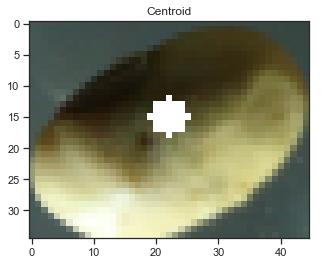

In [24]:
image = cv2.imread("Biji Jelek/biji_10.1.png")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
red_min = numpy.array([45, 1, 1], numpy.uint8)
red_max = numpy.array([255, 255, 255], numpy.uint8)
mask_inverse = cv2.inRange(hsv, red_min, red_max)
mask = cv2.bitwise_not(mask_inverse)
image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
edges = cv2.Canny(binary, 0, 300)
M = cv2.moments(edges)
X0 = int(M["m10"] / M["m00"])
Y0 = int(M["m01"] / M["m00"])
print(X0)
print(Y0)
image = cv2.imread("Biji Jelek/biji_10.1.png")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.circle(rgb, (X0, Y0), 3, (255, 255, 255), -1)
plt.title("Centroid")
plt.imshow(rgb)

In [25]:
hasil = []
for i in glob.iglob("Biji Jelek/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300)
    M = cv2.moments(edges)
    centroid = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])
    hasil.append(centroid)

In [26]:
center = pd.DataFrame(hasil, columns=['X0', 'Y0'])
center 

,X0,Y0
0,18,15
1,22,15
2,18,13
3,20,17
4,21,16
5,18,9
6,23,12
7,22,16
8,16,19
9,16,15


#### Pythagoras
#### r1 -> x makin besar semakin ke bawah

In [27]:
x0 = []
y0 = []
x1 = []
y1 = []
for i in glob.iglob("Biji Jelek/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300, apertureSize=3)
    M = cv2.moments(edges)
    X0 = int(M["m10"] / M["m00"])
    Y0 = int(M["m01"] / M["m00"])
    x0.append(X0)
    y0.append(Y0)
    lngth = 0
    count = 0
    # x ke bawah
    for i in range(X0, len(edges), 1):
        if edges[i][Y0] == 0:
            lngth += 1
        else:
            count = lngth + 1
            lngth += 1
    
    if count == 0 or count < 8:
        count = lngth +1
   
    x1.append(count+X0)
    y1.append(Y0)

hasil = []
for i in range(50):
    r = ((x1[i]-x0[i])**2 + (y1[i]-y0[i])**2)
    hasil.append(math.sqrt(r))

In [28]:
f11 = pd.DataFrame(hasil, columns=['r1'])
f11 

,r1
0,18.0
1,14.0
2,14.0
3,15.0
4,12.0
5,7.0
6,6.0
7,12.0
8,19.0
9,23.0


#### Pythagoras
#### r2 -> y makin besar semakin ke kanan

In [29]:
x0 = []
y0 = []
x2 = []
y2 = []
for i in glob.iglob("Biji Jelek/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300, apertureSize=3)
    M = cv2.moments(edges)
    X0 = int(M["m10"] / M["m00"])
    Y0 = int(M["m01"] / M["m00"])
    x0.append(X0)
    y0.append(Y0)
    lngth = 0
    count = 0
    # y ke kanan
    for i in range(Y0, len(edges[X0]), 1):        
        if edges[X0][i] == 0:
            lngth += 1
        else:
            count = lngth + 1
            lngth += 1
    if count == 0 or count < 8:
        count = lngth +1
        
    x2.append(X0)
    y2.append(count+Y0)

hasil = []
for i in range(50):
    r = ((x2[i]-x0[i])**2 + (y2[i]-y0[i])**2)
    hasil.append(math.sqrt(r))

In [30]:
f12 = pd.DataFrame(hasil, columns=['r2'])
f12 

,r2
0,24.0
1,28.0
2,20.0
3,26.0
4,24.0
5,32.0
6,27.0
7,26.0
8,15.0
9,20.0


In [31]:
f13 = pd.concat([f11, f12], axis=1)
f13

,r1,r2
0,18.0,24.0
1,14.0,28.0
2,14.0,20.0
3,15.0,26.0
4,12.0,24.0
5,7.0,32.0
6,6.0,27.0
7,12.0,26.0
8,19.0,15.0
9,23.0,20.0


#### Pythagoras
#### r3 -> x makin kecil semakin ke atas

In [32]:
x0 = []
y0 = []
x3 = []
y3 = []
for i in glob.iglob("Biji Jelek/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300, apertureSize=3)
    M = cv2.moments(edges)
    X0 = int(M["m10"] / M["m00"])
    Y0 = int(M["m01"] / M["m00"])
    x0.append(X0)
    y0.append(Y0)
    lngth = 0
    count = 0
    # x ke atas
    for i in range(X0, -Y0, -1):
        if edges[i][Y0] == 0:
            lngth += 1
        else:
            count = lngth + 1
            lngth += 1
    
    if count == 0 or count < 8:
        count = lngth +1
   
    x3.append(X0-count)
    y3.append(Y0)

hasil = []
for i in range(50):
    r = ((x3[i]-x0[i])**2 + (y3[i]-y0[i])**2)
    hasil.append(math.sqrt(r))

In [33]:
f14 = pd.DataFrame(hasil, columns=['r3'])
f14 

,r3
0,34.0
1,18.0
2,16.0
3,23.0
4,17.0
5,18.0
6,17.0
7,20.0
8,23.0
9,16.0


#### Pythagoras
#### r4 -> y makin kecil semakin ke kiri

In [34]:
x0 = []
y0 = []
x4 = []
y4 = []
for i in glob.iglob("Biji Jelek/*"):
    image = cv2.imread(i)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    red_min = numpy.array([45, 1, 1], numpy.uint8)
    red_max = numpy.array([255, 255, 255], numpy.uint8)
    mask_inverse = cv2.inRange(hsv, red_min, red_max)
    mask = cv2.bitwise_not(mask_inverse)
    image_blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    binary = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(binary, 0, 300, apertureSize=3)
    M = cv2.moments(edges)
    X0 = int(M["m10"] / M["m00"])
    Y0 = int(M["m01"] / M["m00"])
    x0.append(X0)
    y0.append(Y0)
    lngth = 0
    count = 0
    # y ke kiri
    for i in range(X0, -Y0, -1):        
        if edges[X0][i] == 0:
            lngth += 1
        else:
            count = lngth + 1
            lngth += 1
    if count == 0 or count < 8:
        count = lngth +1
        
    x4.append(X0)
    y4.append(Y0-count)

hasil = []
for i in range(50):
    r = ((x4[i]-x0[i])**2 + (y4[i]-y0[i])**2)
    hasil.append(math.sqrt(r))

In [35]:
f15 = pd.DataFrame(hasil, columns=['r4'])
f15 

,r4
0,21.0
1,27.0
2,21.0
3,23.0
4,25.0
5,23.0
6,30.0
7,26.0
8,19.0
9,21.0


In [36]:
f16 = pd.concat([f14, f15], axis=1)
f16

,r3,r4
0,34.0,21.0
1,18.0,27.0
2,16.0,21.0
3,23.0,23.0
4,17.0,25.0
5,18.0,23.0
6,17.0,30.0
7,20.0,26.0
8,23.0,19.0
9,16.0,21.0


In [37]:
f17 = pd.concat([f13, f16], axis=1)
f17

,r1,r2,r3,r4
0,18.0,24.0,34.0,21.0
1,14.0,28.0,18.0,27.0
2,14.0,20.0,16.0,21.0
3,15.0,26.0,23.0,23.0
4,12.0,24.0,17.0,25.0
5,7.0,32.0,18.0,23.0
6,6.0,27.0,17.0,30.0
7,12.0,26.0,20.0,26.0
8,19.0,15.0,23.0,19.0
9,23.0,20.0,16.0,21.0


In [38]:
f18 = pd.concat([f10, f17], axis=1)
f18

,Red,Green,Blue,r1,r2,r3,r4
0,73.059286,108.015714,109.407143,18.0,24.0,34.0,21.0
1,82.994286,112.419683,111.156825,14.0,28.0,18.0,27.0
2,89.781784,122.668880,122.953510,14.0,20.0,16.0,21.0
3,87.667532,119.694156,118.908442,15.0,26.0,23.0,23.0
4,60.257440,89.659226,88.787202,12.0,24.0,17.0,25.0
5,65.343992,91.052326,91.809109,7.0,32.0,18.0,23.0
6,92.670266,119.240864,114.766611,6.0,27.0,17.0,30.0
7,79.956612,105.941460,108.025482,12.0,26.0,20.0,26.0
8,97.434749,128.731274,128.936680,19.0,15.0,23.0,19.0
9,78.730609,104.430748,103.874654,23.0,20.0,16.0,21.0


#### Kelas Buruk

In [39]:
f18['kelas']=f18.shape[0]*['0']
f18

,Red,Green,Blue,r1,r2,r3,r4,kelas
0,73.059286,108.015714,109.407143,18.0,24.0,34.0,21.0,0
1,82.994286,112.419683,111.156825,14.0,28.0,18.0,27.0,0
2,89.781784,122.668880,122.953510,14.0,20.0,16.0,21.0,0
3,87.667532,119.694156,118.908442,15.0,26.0,23.0,23.0,0
4,60.257440,89.659226,88.787202,12.0,24.0,17.0,25.0,0
5,65.343992,91.052326,91.809109,7.0,32.0,18.0,23.0,0
6,92.670266,119.240864,114.766611,6.0,27.0,17.0,30.0,0
7,79.956612,105.941460,108.025482,12.0,26.0,20.0,26.0,0
8,97.434749,128.731274,128.936680,19.0,15.0,23.0,19.0,0
9,78.730609,104.430748,103.874654,23.0,20.0,16.0,21.0,0


#### Gabungan Kelas Baik dan Buruk

In [40]:
f19 = f9.append(f18)
f19

,Red,Green,Blue,r1,r2,r3,r4,kelas
0,90.363975,114.469565,126.575776,12.0,28.0,25.0,25.0,1
1,92.500000,118.134569,129.025718,17.0,25.0,23.0,23.0,1
2,95.430680,117.470475,127.288190,19.0,24.0,21.0,18.0,1
3,81.403055,103.683901,114.421857,15.0,30.0,24.0,21.0,1
4,81.933107,104.945011,116.504535,22.0,22.0,22.0,22.0,1
5,109.300570,146.877493,153.172365,26.0,21.0,14.0,17.0,1
6,103.872705,138.915545,144.293758,26.0,19.0,18.0,21.0,1
7,103.377289,139.853480,145.479853,24.0,20.0,16.0,16.0,1
8,75.592375,112.730938,122.428886,12.0,34.0,19.0,32.0,1
9,79.701744,110.427907,116.730233,18.0,24.0,24.0,21.0,1


#### Sorting Kelas

In [41]:
f20 = f19.sort_values("kelas")
f20

,Red,Green,Blue,r1,r2,r3,r4,kelas
49,60.413580,92.943673,95.759259,4.0,38.0,20.0,29.0,0
21,71.279789,113.745098,115.582202,26.0,19.0,14.0,17.0,0
20,75.804762,111.902381,116.217857,5.0,37.0,15.0,22.0,0
19,64.324604,86.987998,90.010366,30.0,19.0,18.0,16.0,0
18,70.899802,92.508240,93.586684,26.0,17.0,16.0,21.0,0
17,91.297059,117.679902,119.151471,15.0,29.0,27.0,28.0,0
16,93.840035,124.282343,128.722902,6.0,34.0,15.0,24.0,0
15,101.726950,125.541844,126.467376,9.0,27.0,34.0,30.0,0
14,84.408638,116.194352,115.052326,9.0,34.0,20.0,19.0,0
13,81.671242,113.065359,115.943137,14.0,30.0,22.0,19.0,0


## Dataset 

In [42]:
f20.to_csv('Biji_Kedelai.csv', header=True, index=False)